In [8]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
from bokeh.util.warnings import BokehDeprecationWarning

warnings.filterwarnings('ignore', category=BokehDeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [18]:
path = 'TSLA_stock_data.csv'
stock_data = pd.read_csv(path, parse_dates=True, index_col='Date')
stock_data = stock_data[stock_data.index >= '2022-01-01']

In [19]:
sma_period = 20

stock_data['SMA'] = stock_data['Close'].rolling(window=sma_period).mean()

stock_data['STD'] = stock_data['Close'].rolling(window=sma_period).std()

stock_data['Upper_Band'] = stock_data['SMA'] + (stock_data['STD'] * 2)
stock_data['Lower_Band'] = stock_data['SMA'] - (stock_data['STD'] * 2)

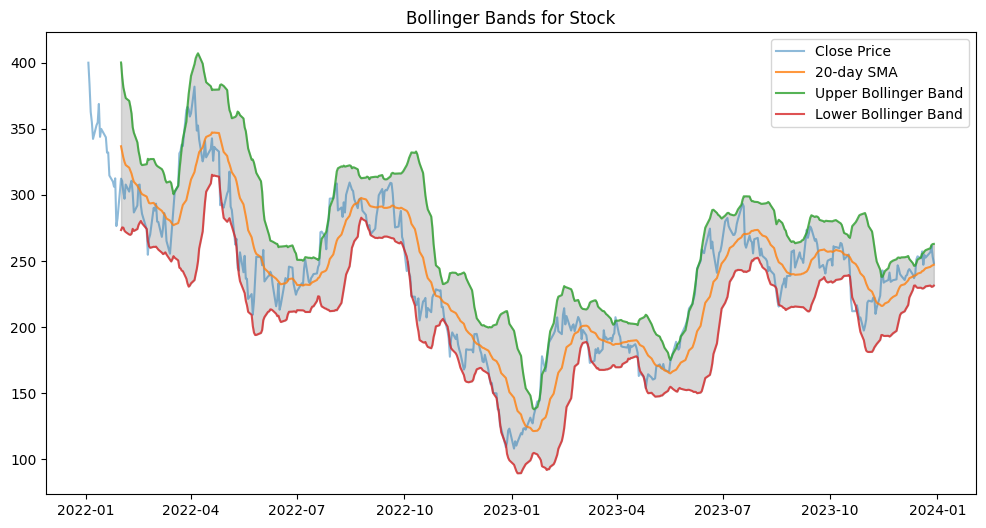

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA'], label='20-day SMA', alpha=0.8)
plt.plot(stock_data['Upper_Band'], label='Upper Bollinger Band', alpha=0.8)
plt.plot(stock_data['Lower_Band'], label='Lower Bollinger Band', alpha=0.8)
plt.fill_between(stock_data.index, stock_data['Upper_Band'], stock_data['Lower_Band'], color='grey', alpha=0.3)
plt.title('Bollinger Bands for Stock')
plt.legend()
plt.show()

In [21]:
class BollingerBandStrategy(Strategy):
    def init(self):
        # Inherit and utilize already calculated Bollinger Bands
        self.upper_band = self.I(lambda x: x['Upper_Band'], self.data.df)
        self.lower_band = self.I(lambda x: x['Lower_Band'], self.data.df)
        self.close_prices = self.data.Close

    def next(self):
        # If current price crosses below the lower band, buy
        if crossover(self.close_prices, self.lower_band):
            self.buy()

        # If current price crosses above the upper band, sell
        elif crossover(self.upper_band, self.close_prices):
            self.sell()

In [23]:
bt = Backtest(stock_data, BollingerBandStrategy, cash=10000, commission=.002, exclusive_orders=True)
stats = bt.run()

print(stats)

bt.plot()

Start                     2022-01-03 00:00:00
End                       2023-12-29 00:00:00
Duration                    725 days 00:00:00
Exposure Time [%]                   74.850299
Equity Final [$]                  8668.779568
Equity Peak [$]                  11050.799859
Return [%]                         -13.312204
Buy & Hold Return [%]               -37.86861
Return (Ann.) [%]                   -6.933533
Volatility (Ann.) [%]               47.361871
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -60.437955
Avg. Drawdown [%]                  -21.112438
Max. Drawdown Duration      407 days 00:00:00
Avg. Drawdown Duration      108 days 00:00:00
# Trades                                   30
Win Rate [%]                        33.333333
Best Trade [%]                      11.121209
Worst Trade [%]                      -8.49326
Avg. Trade [%]                    

GridPlot(id='p2749', ...)